# Analyze A/B Test Results 

- **Can we test everything?: NO. There are situations we cannot analyze through A/B test.**
  - For example, if you are adding a new experience and want to test it, old users may resist against the new version (change aversion), or old users may all go for the new experience, then the test set has everything (novelty effect). 
  - Two issues to consider when it comes to new experience: 
     - (1) what is the base of your comparison? 
     - (2) how much time you need in order for your users to adapt to the new experience, so that you can actually say what is the plateaued experience and make a robust decision? Except for new experience, long term effect is hard to test too. 
     - For example, a home rental website test its referral effect, but a customer may not return even in six months, it’s very hard to measure through A/B testing. If this is the case, what shall we do? 
  - When A/B testing is not useful, we can:
       - Analyze the user activity logs
       - Conduct retrospective analysis
       - Conduct user experience research
       - Focus groups and surveys
       - Human evaluation
- **Metric**: Difference between click-through rate or click-through probability?: CTR is used to measure the usability (e.g. how easy to find the button, # of click/# of pageview). CTP is used to measure the impact (# of unique visitors click/# of unique visitors view the page).
- **Statistical significance vs. practical significance**: Statistical significance is about repeatability. Practical significance depends on industry e.g. medicine vs. internet.
  - Statistical significance \alpha: the probability you happen to observe the effect in your sample if H_0 is true.
  - Small sample: alpha low, beta high. 
  - Larger sample, alpha same, beta lower (any larger change than your practical significant boundary will have a lower beta, so it will be easier to detect the significant difference. 1-beta also called sensitivity)
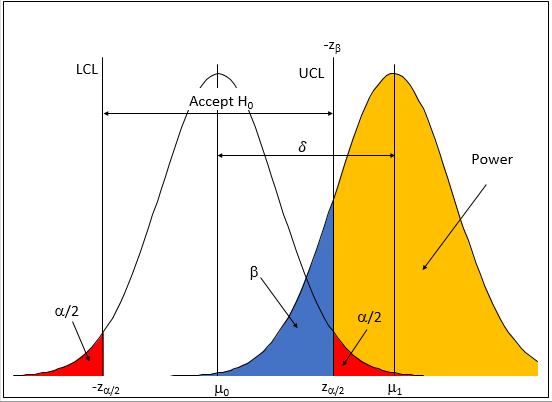
<a id='intro'></a>

**Four principles of AB Test**
- **First Principle: Risk**: What risk is the participant undertaking? The main threshold is whether the risk exceeds that of “minimal risk”. Minimal risk is defined as the probability and magnitude of harm that a participant would encounter in normal daily life. The harm considered encompasses physical, psychological and emotional, social, and economic concerns. If the risk exceeds minimal risk, then informed consent is required.

- **Second Principle: Benefits**: What benefits might result from the study? Even if the risk is minimal, how might the results help? In most online A/B testing, the benefits are around improving the product.

- **Third Principle: Alternatives**:What other choices do participants have? For example, if you are testing out changes to a search engine, participants always have the choice to use another search engine. The main issue is that the fewer alternatives that participants have, the more issue that there is around coercion and whether participants really have a choice in whether to participate or not, and how that balances against the risks and benefits. In online experiments, the issues to consider are what the other alternative services that a user might have, and what the switching costs might be, in terms of time, money, information, etc.

- **Fourth Principle: Data Sensitivity**:Three main issues with data collection with regards to experiments:
   - For new data being collected and stored, how sensitive is the data, and what are the internal safeguards for handling that data? E.g., what access controls are there, how are breaches to that security caught and managed, etc.?
   - Then, for that data, how will it be used and how will participants’ data be protected? How are participants guaranteed that their data, which was collected for use in the study, will not be used for some other purpose? This becomes more important as the sensitivity of the data increases.
   - Finally, what data may be published more broadly, and does that introduce any additional risk to the participants?

- **Identified data** means that data is stored and collected with personally identifiable information. This can be names, IDs such as a social security number or driver’s license ID, phone numbers, etc. HIPAA is a common standard, and that standard has 18 identifiers (see the Safe Harbor method) that it considers personally identifiable. Device id, such as a smartphone’s device id, are considered personally identifiable in many instances.

- **Anonymous data** means that data is stored and collected without any personally identifiable information. This data can be considered pseudonymous if it is stored with a randomly generated id such as a cookie that gets assigned on some event, such as the first time that a user goes to an app or website and does not have such an id stored.

- In most cases, anonymous data still has time-stamps -- which is one of the HIPAA 18 identifiers. Why? Well, we need to distinguish between anonymous data and anonymized data. **Anonymized data** is identified or anonymous data that has been looked at and guaranteed in some way that the re-identification risk is low to non-existent, i.e., that given the data, it would be hard to impossible for someone to be able to figure out which individual this data refers to. Often times, this guarantee is done statistically, and looks at how many individuals would fall into every possible bucket (i.e., combination of values).What this means is that anonymous data may still have high re-identification risk (see AOL example).

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

1. **You define a baseline conversion and Minimum Detectable Effect (MDE):**
   - Baseline conversion — the percentage which defines the current conversion rate of the page you want to test. 
   - Minimum Detectable Effect (MDE) — the minimum expected conversion lift.
2. You calculate the **sample size** you need for a meaningful experiment with a specialized calculator using the above-mentioned variables and statistical power as well as significance level:
   - **Statistical power** — the percent of the time when the minimum effect size is detected, assuming it exists. Normally, 80% is an optimal statistical power.
   - **Significance level** — the percent of the time the difference (MDE) will be detected, assuming it doesn’t exist. Put simply, it’s the percent of the time when a test proves your hypothesis when in reality this hypothesis is false. As a rule, 5% significance level is used in mobile A/B testing.
3. You start driving traffic to your variations. The test can be finished only when each variation was visited by the necessary number of users 
4. You evaluate the results of your A/B test. If the difference in performance between variations reached MDE or exceeded it, you can consider that the hypothesis of your experiment is proven right. Otherwise, it’s necessary to start the test from scratch.
5. **There are a few common rules when it comes to classic A/B testing**:
   - The higher your baseline conversion rate, the less traffic you need to find a statistically significant difference. For example:
     - Baseline conversion=3%, MDE=5%, sample size (per variation) = 204,493
     - Baseline conversion=5%, MDE=5%, sample size (per variation) = 120,146
   - The higher the expected conversion lift, the less traffic you need. This aspect once again proves the importance of a strong hypothesis which potentially causes a greater difference in variations performance. Judge for yourself, sample size discrepancy might be truly dramatic:
     - Baseline conversion=3%, MDE=5%, sample size (per variation)=204,493
     - Baseline conversion=3%, MDE=10%, sample size (per variation)=51,486

# Step 1: Calculate sample size, decide practical significance /mde

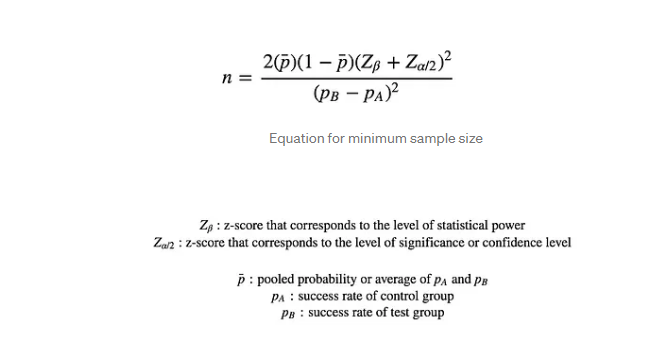

In [5]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
          """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [6]:
x=min_sample_size(bcr=0.096, mde=0.02, power=0.8, sig_level=0.05)
x

3718.956195729285

In [7]:
print(x, 'for each group- control and treatment')

3718.956195729285 for each group- control and treatment


Assuming Treatment and Control are of equal size, the total number of samples you need to achieve 80% power can be derived from the power formula above, and is approximately as shown in Equation 17.8 (van Belle 2008):


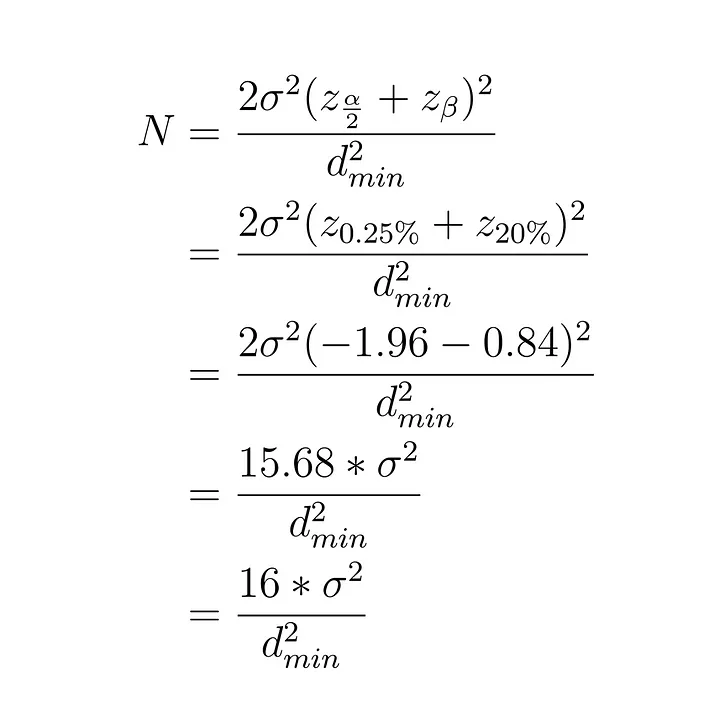

- 𝜎: the standard deviation of the observations in each group. We assume the standard deviations to be the same in the two groups 
- 𝑑𝑚𝑖𝑛: the minimum detectable effect, that is the level of statistically significant difference that can be detected given the sample size 𝜨. For instance, if the conversion rate of the control group is 10% and we expect the treatment can actually increase the conversion from 10% to 15%(note that this is our expectation), then (the absolute) 𝑑𝑚𝑖𝑛 is 15%-10%=5%.

In [8]:

from scipy.stats import norm

def get_sample_size_with_power(mu_1, std_1, mde, is_absolute_mde, alpha=0.05, beta = 0.2):
    '''
    get_sample_size_with_power(...) takes in two sample statistics (mu_1, std_1) of the control group (as baselines) 
    and two manually-determined inputs (alpha, mde), returns the minimum required sample size, as demonstrated in Figure 6.
    
    Note that get_sample_size_with_power(...) calculates the sample size that gives us the statistical power (1-beta) we specify. 
    Meanwhile, it assumes the standard deviations are the same in the two groups. 
    However, it is easy to release this assumption by replacing 2*variance with variance_1+variance_2
    
    Input:
        mu_1: float, the sample mean of the control group (group 1)'s metric
        std_1: float, the standard deviation of the control group (group 1)'s metric
        mde: float, the minimal detectable effect (MDE), often set by the analyst using domain knowledge 
        is_absolute_mde: bool, True means the mde input is absolute MDE, False means it is relative MDE
        alpha: float, the significance level and set as 0.05 by default （assuming 5% significance level)      
        beta: float, the type II error rate and set as 0.2 by default (assuming 80% statistical power)
    Output:
        n: int, the minimum required sample size (based on the single-tail hypothesis testing), determined by the formula in Figure 6. 
    '''
    if is_absolute_mde:
        # Absolute MDE
        dmin = mde
    else:
        # Relative MDE
        dmin = mu_1*mde

    stat_power = 1-beta

    # Calculate the minimum required sample size 
    n = np.ceil(
            2*(pow(norm.ppf(1-alpha/2)+norm.ppf(stat_power),2))*pow(std_1,2) # Numerator        
        / pow(mde,2) # Denominator
        )
    
    print(('In order to detect a change of {0:f} between groups with the SD of {1},'.format(mde, std_1)))
    print(('with significance {0} and statistical power {1}, we need in each group at least {2:d} subjects.'.format(alpha, stat_power, int(n))))
    return n

In [9]:
base_cvr = 0.096
N = get_sample_size_with_power(
    mu_1 = base_cvr, 
    std_1 = np.sqrt(base_cvr*(1-base_cvr)),
    mde = 0.02, 
    is_absolute_mde = True,
    alpha=0.05, 
    beta = 0.2
)

In order to detect a change of 0.020000 between groups with the SD of 0.2945912422323515,
with significance 0.05 and statistical power 0.8, we need in each group at least 3406 subjects.


# Step 2: Sanity Check
- The Sample Ratio Mismatch (SRM) metric looks at the ratio of users between two variants, usually a Treatment and the Control. If the experiment design calls for exposing a certain ratio of users (say 1:1) to the two variants, then the results should closely match the design. Unlike metrics that could be impacted by the Treatment, the decision to expose a user to a variant must be independent of the Treatment, so the ratio of the users in the variants should match the experimental design.

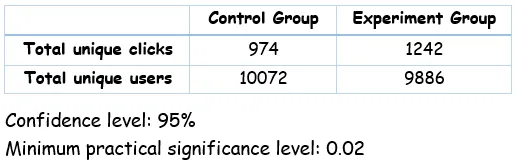

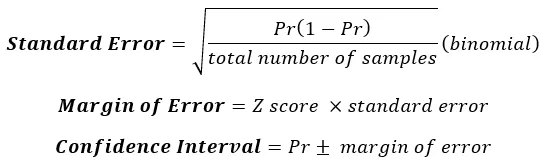

In [5]:
import numpy as np
p= 0.5
n1= 10072
n2= 9886
margin_of_error= 1.96* np.sqrt((p*(1-p))/(n1+n2))

In [6]:
expected_interval= 0.5- margin_of_error, 0.5+margin_of_error
expected_interval

(0.49306306593559884, 0.5069369340644011)

In [7]:
actual_p= n1/(n1+n2)
actual_p # no srm

0.5046597855496543

In [10]:
control = 10072/ (9986 + 10072) 
experiment = 9886/ (9986 + 10072)

In [11]:
observed = [ 10072, 9886 ]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=1.73344022447139, pvalue=0.18797214473413368)


In [13]:
if chi[1] < 0.05:
    print('Warning. SRM may be present.')
else:
    print('Probably no SRM.')

Probably no SRM.


# Step 3: Observation

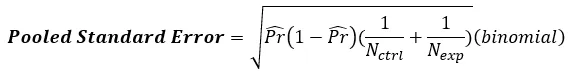
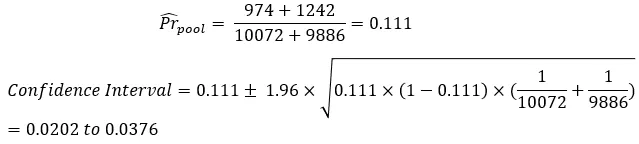

In [24]:
#minimum detectable difference/pratical significance= 0.02 or 2%
p1= 974/10072 # rate of control group= converted/totalpageviews
p2= 1242/9886 # rate of experiment group= converted/totalpageviews
print('rate of control group',p1)
print('rate of experiment group',p2)

rate of control group 0.09670373312152503
rate of experiment group 0.12563220716164272


In [25]:
import scipy.stats 
def proportion_confidence_interval(p1, p2, n1, n2, confidence=0.95):
    x= ((p1*(1-p1))/n1) + ((p2*(1-p2))/n2)
    se= np.sqrt(x)
    sl= 1- confidence
    h = se * scipy.stats.norm.ppf(1-sl/2) # 1.96=the z-critical value based on the confidence level
    return p2-p1-h, p2-p1+h

In [26]:
proportion_confidence_interval(p1=p1, p2=p2, n1=10072, n2=9886, confidence=0.95) # first case

(0.0202106398561862, 0.03764630822404919)

# Launch or not?

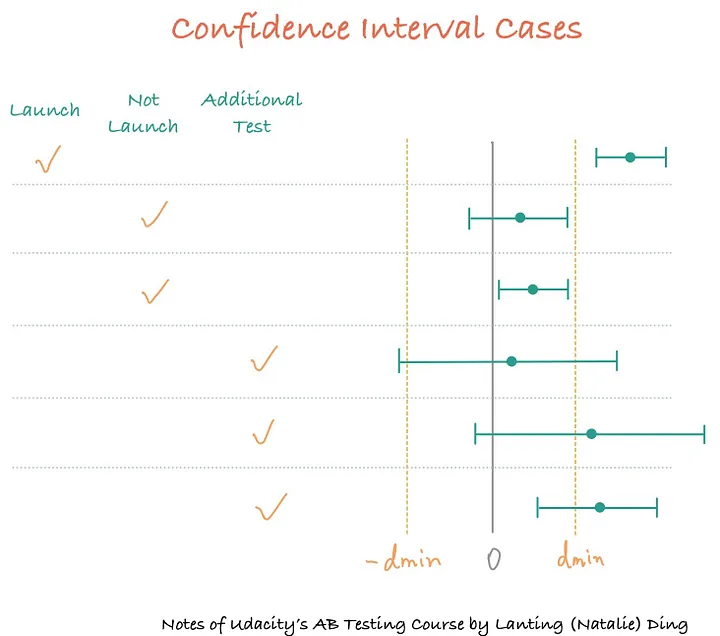

- launch as practically signficant (interval is beyond d min/ mde/0.02) and statsitically significant(CI doesnt include 0)
- dont launch as practically insignficant (interval is before d min/ mde/0.02) and statsitically insignificant(CI includes 0)
- dont launch as practically insignficant (interval is before d min/ mde/0.02) and statsitically significant(CI doesnt include 0)
- increase power
- increase power
- increase power

# Step 1: Choose and characterize metrics for both sanity check and evaluation

- **Guardrail metrics/ Sanity Checking / Invariant Checking**: to make sure the experiment is run properly.These metrics should remain unchanged between control and experiment groups, e.g. Is population the same? Is distribution the same?
  - Ensure that your goal metrics are: Simple: easily understood and broadly accepted by stakeholders. Stable: it should not be necessary to update goal metrics every time you launch a new feature. 
  - Examples:
    - **SRM**
    - **Latency**: latency is often used as a guardrail metric because it is so sensitive, especially relative to revenue and user satisfaction metrics.
    - **HTML response size per page**. On a website, the server response size is an early indicator that a large amount of code (such as JavaScript) was introduced. Alerting on such a change is a great way to uncover a possibly sloppy piece of code that could be optimized.
    - **JavaScript errors per page**. Degrading (i.e., increasing) the average number of errors on the page is a ship blocker. Segmenting by browsers helps to identify whether the JavaScript issue is browser dependent. 
    - **Revenue-per-user**. A team that works on one part of the product, such as relevance, may not realize that they are hurting revenue. Revenue-per-user usually has high statistical variance, so it is not sensitive as a guardrail; more sensitive variants can be great alternatives, such as revenue indicator-per-user (was there revenue for user: yes/no), capped revenue-per-user (anything over \$X is capped to \$X), and revenue-per-page (there are more page units, although care must be taken to correctly compute the variance, see Chapter 22). 
    - **Pageviews-per-user**. Because many metrics are measured per page (such as, CTR), a change to pageviews-per-user could imply that many metrics changed. It is natural to focus on the numerator, but if pageviews-per-user changes, it is the denominator that changes, which requires thought. If the change is unexpected, it is worth reviewing the reasons carefully (Dmitriev et al. 2017). Note that pageviews-per-user may not work as a guardrail in all cases; for example, if you are testing an infinite scroll feature, then pageviews-per-user will almost certainly change. 
    - **Client crashes**. For client software (e.g., Office Word/PowerPoint/Excel, Adobe Reader) or phone applications (e.g., Facebook, LinkedIn, Minecraft, Netflix), crash rate is a critical guardrail metric. In addition to a count metric (crashes-per-user), an indicator is commonly used (Did the user crash during the experiment?), which is averaged over all users, as indicators have lower variance and thus show statistical significance earlier.


 

- **Evaluation:**
  - High-level business metrics: revenue, market share, how many users
  - More detailed metrics that reflect the user’s experience with the product
    - Set up a set of techniques to help dig into the user experience, e.g. user experience research — users are not finishing a class — dig into the reason- quit too difficult, video of class too long?
    - For some experiences, might not have the information you need. E.g. (1) do students have improved skills — very nebulous and cannot measure it takes too long to get the information,(2) Do students get jobs after taking the class? — It could be more than 6 months, and the experiment is too short for getting such information.
  - Ensure that driver metrics are: 
    - **Aligned with the goal**: It is important to validate that the driver metrics are in fact drivers of success. One common technique for this validation is to run experiments expressly for this purpose. We discuss this further below. 
    - **Actionable and relevant**: Teams must feel that they can act on the levers (e.g., product features) to move these metrics.
    - **Sensitive**: Driver metrics are leading indicators for goal metrics. Ensure that they are sensitive enough to measure impact from most initiatives. 
    - **Resistant to gaming**: Because driver metrics and your goal metrics measure success, don’t make them easily gameable. Think through the incentives and what behavior a metric may drive and how it might be gamed.

- **How to Define Metrics**
  - Step 1: High-level concepts. A one-sentence summary that everyone can understand — e.g. active users, click-through-probability
  - Step 2: Define the details. What constitutes active users? The first page of the search results, or all the next pages? US only or globally? Removing spam or not? Latency — how long does it take a page to load: when does the first byte load? Last byte load?
  - Step 3: Take all these individual data measurements and summarize them into a single metric, e.g. use median, sum, average, count, etc.
- **Single or multiple metrics?**
  - Depend on company culture and how comfortable people are with the data. If we want different teams to move towards the same goal, then we might want a single metric.
  - If we have multiple metrics, we can create a composite metric — objective function or OEC (overall evaluation criteria - a weighted function that combines all these metrics). The OEC must be measurable in the short term (the duration of an experiment) yet believed to causally drive long-term strategic objectives
  - Do not suggest using composite metric because(1) hard to define and get agreements from different groups (2) can run into problems if you over-optimize looking into one thing and do not look at others (3) when the metric moves, people will come in and ask why it moves, and have to go back and check individual metric anyway
  - Better to design a less optimal metric applicable to the whole suite of AB tests, than a perfect metric.

- **Example — Funnel plot to create metrics**
   - There might be swirls — customers from the later layer of the funnel go back to the earlier step — e.g. students finished lesson 2 of a course enrolled in a different course.
   - Track steps across different platforms — phone vs. computer
   - Track progress of funnel across platforms
   - Keep the counts at key steps (e.g. visit home pages, enroll in courses), and calculate rates at other steps.
- **Gathering Additional Data**
  - User Experience Research (UER): 👍Good for brainstorming, can use special equipment. 😔 Want to validate results, often only a few users but can go very deep, special equipment — e.g. special camera to capture eye movement
  - Focus Groups: 👍Can show screenshots of images, walk through the demo and ask questions, including hypothesis questions, get feedback on the hypothesis. 😔 Run the risk of group thinking, more users but less deep
  - Surveys: 👍 How many students get jobs after the course — whether the course contributes to them finding jobs, useful for metrics you cannot directly measure. 😔 Can’t directly compare to other results
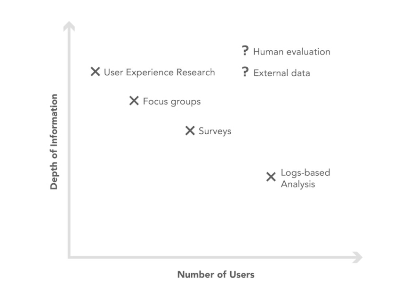
- **Filtering and Segmenting**
  - External factors to consider: competitor clicking through your website on everything, someone malicious trying to mess up your metric, additional traffic caused by a new experiment,… Need to at least flag and identify these issues, and eventually filter them out
  - Internal factors to consider: some changes only impact a subset of your traffic (e.g. region), or only impact some platform — then need to filter only the affected traffic/platform

- **How to tell if the data is biased or not?**
  - Segmenting the data, and calculating the metric on these various disjoint segments (e.g. country, language, platform). See if the traffic is moved disproportionally across segments and makes sense.
  - Look at Day over Day or Week over Week traffic pattern changes to identify things that are unusual.

- **Summary statistics**
  - Sums and Counts — e.g. number of users who visit the website
  - Distributional metrics — e.g. means, median, percentiles
  - Rates or probabilities
  - Ratio — range of different business models, but it is very hard to categorize

- **Sensitivity & Robustness**:Metric should pick up the changes you care about (sensitivity), and do not pick up the changes that you do not care about (robustness). e.g. Mean is sensitive to outliers and heavily influenced by these observations. Median is less sensitive and more robust, but if you only affect a fraction of users, even a large fraction like 20%, the median might not change.
  - **How to measure sensitivity and robustness?**
    - **Experiment**: 
      - Run experiments or use experiments already have. E.g. Latency — increase the quality of the video (increase the load time for users), and see if the metric responds to that. Can look back at the experiments run by your company earlier — see if these experiments move the metrics you are interested in 
      - **A/A experiment**. Compare people seeing the same thing to each other. See if the metric picks up the difference between the two. Make sure you don’t call things significant that really do not mean anything. The idea of an A/A test is simple: Split the users into two groups as in a regular A/B test but make B identical to A (hence the name A/A test). If the system is operating correctly, then in repeated trials about 5% of the time a given metric should be statistically significant with p-value less than 0.05. When conducting t-tests to compute p-values, the distribution of p-values from repeated trials should be close to a uniform distribution.

      - One way to improve sensitivity is **reducing variance**:
        - Create an evaluation metric with a smaller variance while capturing similar information. For example, the number of searches has a higher variance than the number of searchers; purchase amount (real valued) has higher variance than purchase (Boolean).
        - Transform a metric through capping, binarization, or log transformation. For example, instead of using average streaming hour, Netflix uses binary metrics to indicate whether the user streamed more than x hours in a specified time period (Xie and Aurisset 2016). For heavy long-tailed metrics, consider log transformation, especially if interpretability is not a concern. However, there are some metrics, such as revenue, where a log-transformed version may not be the right goal to optimize for the business. 
        - Use triggered analysis. This is a great way to remove noise introduced by people not affected by the Treatment. 
        - Use stratification, Control-variates or CUPED (Deng et al. 2013). In stratification, you divide the sampling region into strata, sample within each stratum separately, and then combine results from individual strata for the overall estimate, which usually has smaller variance than estimating without stratification. The common strata include platforms (desktop and mobile), browser types (Chrome, Firefox and Edge) and day of week and so on. While stratification is most commonly conducted during the sampling phase (at runtime), it is usually expensive to implement at large scale. Therefore, most applications use post-stratification, which applies stratification retrospectively during the analysis phase.
    - **Retrospective analysis (to test if the metric is over sensitive and catch spurious difference)**
      - Look back at the changes on your website, and see if the metrics you are interested in move-in conjunction with these changes.
      - Or can look at the history of the metrics and see if there is anything that causes these changes.
      - Plot the distribution (check mean/median/each quantile and see which one is more suitable)
 - **Absolute change or relative change (to compute the difference between the experiment and control)**:
   - Absolute difference: if you just get started with the experiment and want to understand the possible metrics
   - % change advantage: only need to pick one practical significance boundary to get stability over time (e.g. seasonality, shopping behavior)

**Triggering**
- Users are triggered into the analysis of an experiment if there is (potentially) some difference in the system or user behavior between the variant they are in and any other variant (counterfactual).
- If you make a change that only impacts some users, the Treatment effect of those who are not impacted is zero. This simple observation of analyzing only users who could have been impacted by your change has profound implications for experiment analysis and can significantly improve sensitivity or statistical power.
- **Example 1**: Intentional Partial Exposure Suppose you are making a change and running the experiment on a segment of the population: only users from the US. You should only analyze users from the US. Users from other countries were not exposed to the change, so the Treatment effect for them is zero and adding them to the analysis just adds noise and reduces the statistical power. Note that you must include “mixed” users, those from both the United States and other countries, in the analysis if they could have seen the change. Be sure to include all their activities after seeing the change even activities performed outside the United States, because they were exposed and there could be residual effects on the non-US visit.
- **Example 2**: Conditional Exposure Suppose the change is to users who reach a portion of your website, such as checkout, or users who use a feature, like plotting a graph in Excel, then only analyze those users. In these examples, as soon as the user was exposed to a change, they triggered into the experiment because there was some difference.
- **Example 3**: Coverage Increase Suppose that your site is offering free shipping to users with more than \\$35 in their shopping cart and you are testing a lower threshold of \\$25. A key observation is that the change only impacts users who at some point started checkout with a shopping cart between \\$25 and \\$35. Users with shopping carts over \\$35 and those with shopping carts under \\$25 have the same behavior in Treatment as Control. Only trigger users who see the free shipping offer when they have \\$25 to \\$35 in their shopping cart. For this example, we assume that no “advertisement” of the free shipping promotion is on the site; if at some point free shipping displays for the user and it is different between Control and Treatment, that immediately becomes a trigger point.
- **Example 4**: Coverage Change Things become a bit more complicated when the coverage isn’t increased, but is changed. For example, suppose Control offers free shipping to shoppers with at least \\$35 in their cart but Treatment offers free shipping to users with at least \\$25 in their cart except if they returned an item within 60 days before the experiment started. Both Control and Treatment must evaluate the “other” condition, that is, the counterfactual, and mark users as triggered only if there is a difference between the two variants. 
- **Example 5**: Counterfactual Triggering for Machine Learning Models Suppose you have a machine learning classifier that classifies users into one of three promotions or a recommender model that recommends related products to the one shown on the page. You trained the new classifier or recommender model, and V2 did well in your offline tests. The key observation is that if the new model overlaps the old model for most users, as when making the same classifications or recommendations for the same inputs, then the Treatment effect is zero for those users. How would you know? You must generate the counterfactual. The Control would run both the model for Control and Treatment and expose users to the Control while logging the Control and Treatment (counterfactual) output; the Treatment would run both the model for Control and Treatment and expose users to the Treatment while logging the output of both models. Users are triggered if the actual and counterfactual differ.

- **Variability: Metrics’ distribution & variance (for sanity/invariability check, or how to size your experiment)**:
  - Different metrics might have different variabilities. For some metrics, their variability is so high and it’s not practical to use them in the experiment even if the metric makes a lot of business or product sense.
  - To calculate the variability, we need to understand the distribution of the underlying data and do the calculation by using analytical or empirical techniques.
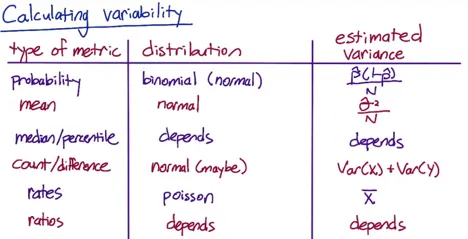
  - For median and ratios, the distribution of median depends on the distribution of the underlying data. We can use non-parametric methods — analyze the data without making assumptions on what the distribution is.
  - **Empirical Variances**: For more complicated metrics, you might have to estimate the variance empirically than analytically. Use **A/A** test to estimate the empirical variance of the metrics. — Compare the difference so that the difference is driven by the underlying variability, such as system, user populations, etc. If you see a lot of variability in a metric in an A/A test, it might be too sensitive to use in the experiment.
  - What if we don’t want to run a lot of A/A tests? Use **Bootstrapping**! Run one A/A test — although it is just one experiment, it is calculated from a lot of individual data points (individual clicks and page views). Take a random sample of data points from each side of the experiment, and calculate the click-through probability based on that random sample as if it was a full experimental group. Record the difference in click-through probability, and use that as a simulated experiment. Repeat this process multiple times, record the results, and use them as if they were from an actual experiment.

# # Observation A/A- empirical 1

In [58]:
df= pd.read_excel('Book1.xlsx', sheet_name='Book1')
df['diff'] = df['Group 1']- df['Group 2']
df.head()

,Group 1,Group 2,diff
0,0.02,0.07,-0.05
1,0.11,0.11,0.00
2,0.14,0.05,0.09
3,0.05,0.07,-0.02
4,0.09,0.10,-0.01


In [59]:
avg_diff = df['diff'].mean()
std_diff = df['diff'].std()
print('std:',std_diff)
print('mean',avg_diff)
ME = 1.96*std_diff

std: 0.036366193091936366
mean 0.004249999999999999


In [60]:
(avg_diff-ME,avg_diff+ME) #95% CI

(-0.06702773846019527, 0.07552773846019528)

# Observation A/A- empirical 2

In [61]:
#40 data points, 95% CI can be gained by subtracting 2 points at max and min (because CI two-tailed)
df['diff_order']= df['diff'].copy()
df.head()

,Group 1,Group 2,diff,diff_order
0,0.02,0.07,-0.05,-0.05
1,0.11,0.11,0.00,0.00
2,0.14,0.05,0.09,0.09
3,0.05,0.07,-0.02,-0.02
4,0.09,0.10,-0.01,-0.01


In [62]:
0.95*40 #38 units to be included

38.0

In [63]:
diff2=df['diff_order'].sort_values(ascending= True)
diff2

36   -0.08
32   -0.06
9    -0.06
0    -0.05
37   -0.03
14   -0.03
33   -0.02
29   -0.02
24   -0.02
20   -0.02
39   -0.02
3    -0.02
4    -0.01
22   -0.01
6    -0.01
34   -0.01
27   -0.01
1     0.00
15    0.00
31    0.00
7     0.00
11    0.01
17    0.01
23    0.01
12    0.02
26    0.02
19    0.02
38    0.02
13    0.02
8     0.02
21    0.03
30    0.03
28    0.04
5     0.04
18    0.04
16    0.04
10    0.05
25    0.06
35    0.08
2     0.09
Name: diff_order, dtype: float64

In [64]:
diff = diff2[1:-1]
(diff.min(),diff.max())

(-0.06000000000000001, 0.08)

# Step 2: Designing an experiment

- **Step 1: Choose “Subject” — Unit of Diversion**:
  - Subject: decide how to assign events to either the control or experiment
  - Unit of diversion is how we define what an individual subject is in the experiment — look for proxy for users
  - How to choose the unit of diversion?
    - **Page-level**: Each new web page viewed on a site is considered a unit. 
    - **Session-level**: This unit is the group of webpages viewed on a single visit. A session, or visit, is typically defined to end after 30 minutes of inactivity. 
    - **User-level**: All events from a single user is the unit. Note that a user is typically an approximation of a real user, with web cookies or login IDs typically used. Cookies can be erased, or in-private/incognito browser sessions used, leading to overcounting of users. For login IDs, shared accounts can lead to undercounting, whereas multiple accounts (e.g., users may have multiple e-mail accounts) can lead to overcounting. User-level randomization is the most common as it avoids inconsistent experience for the user and allows for long-term measurement such as user retention
      - A **signed-in user ID or login** that users can use across devices and platforms. Signed-in IDs are typically stable not just across platforms, but also longitudinally across time. 
      - A **pseudonymous user ID, such as a cookie**. On most websites when a user visits, the website writes a cookie containing an identifier identifier (usually mostly random). On mobile devices for native apps, the OS often provides a cookie, such as Apple’s idFA or idFV or Android’s Advertising ID. These IDs are not persistent across platforms, so the same user visiting through desktop browser and mobile web would be considered two different IDs. These cookies are controllable by the user through either browser-level controls or device OS-level controls, which means that cookies are typically less persistent longitudinally than a signed-in user ID. 
      - A **device ID** is an immutable ID tied to a specific device. Because it is immutable, these IDs are considered identifiable. Device IDs do not have the cross-device or cross-platform consistency that a signed-in identifier has but are typically stable longitudinally.
      - **IP-based variant assignment** may be the only option for infrastructure changes, such as for comparing latency using one hosting service (or one hosting location) versus another, as this can often only be controlled at the IP level. We do not recommend using IP addresses more generally, however, because they vary in granularity. At one extreme, a user’s device IP address may change when a user moves (e.g., a different IP address at home than work), creating inconsistent experiences. At the other extreme, large companies or ISPs have many users sharing a small set of IP addresses representing the firewall. This can lead to low statistical power (i.e., do you have enough IP addresses, especially to handle the wide variance), as well as potential skew and outlier issues from aggregating large numbers of users into a single unit.


  - **Consistency**:
     - **User consistency**:
       - If using user id, users get consistent experience as they change devices as long as they stay signed in. 
       - If you test a change that crosses the sign-in and sign-out border, user id might not work well. e.g. location of a sign-in bar, the layout of a page. In such cases, can use cookies so that you can stay consistent across and the border of sign-in and sign-out, but not across devices.
     - **User Visibility**: For user visible changes, we should always consider using a user id or cookie as unit of diversification. For changes not visible to users, such as latency changes, backend infrastructure changes, ranking changes, should consider event-based diversification.
     - **what you want to measure**:
       - Learning effect — whether a learner adapts to change. Might still want to use user_id or cookie.
       - Latency change whether the user uses the site less — might still choose user id or cookie although the change is not visible. Totally depends on the measurement you are trying to get.
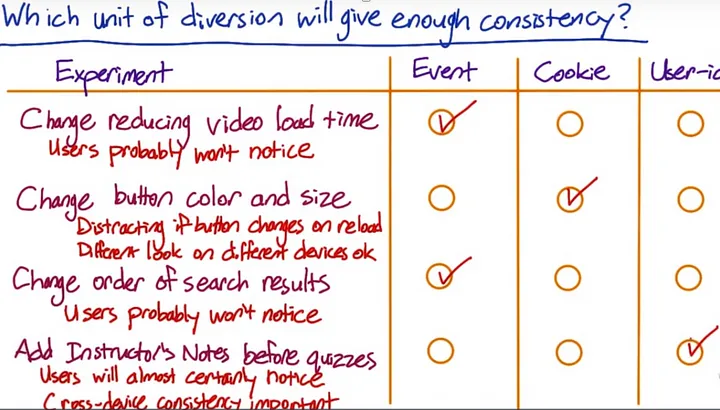
For the first and third ones, there could be a learning effect. We can start with event-based diversion, and switch to cookie-based in the future if necessary.

 - **Ethical Considerations**
   - If you use user id, then it is person identifiable, and there will be security and confidentiality concerns to address, and might need to get user consent. This is less of an issue for cookie-based diversion.

 - **Variability Considerations**:
   - Unit of analysis (what is the denominator of your metric) needs to be consistent with unit of diversion. Otherwise, the actual variability might be a lot different than what was calculated analytically. This is because when calculating the analytical variability, you are assuming: the distribution of the underlying data, what is independent.
   - It is easier to correctly compute the variance of the metrics when the analysis unit is the same as the randomization unit, because the independence assumption between units is reasonable in practice. For example, randomizing by page means that clicks on each pageview are independent, so computation for the variance of the mean, click-through rate (clicks/pageviews), is standard. Similarly, if the randomization unit is user and the metrics analysis unit is also user, such as sessions-per-user, clicks-per-user, and pageviews-per-user, then the analysis is relatively straightforward.
   - If you use event-based diversion, you assume each event is independent. But if you use user id or cookie-based diversion, the independence assumption is no longer valid, as you are diverting groups of events and they are actually correlated.
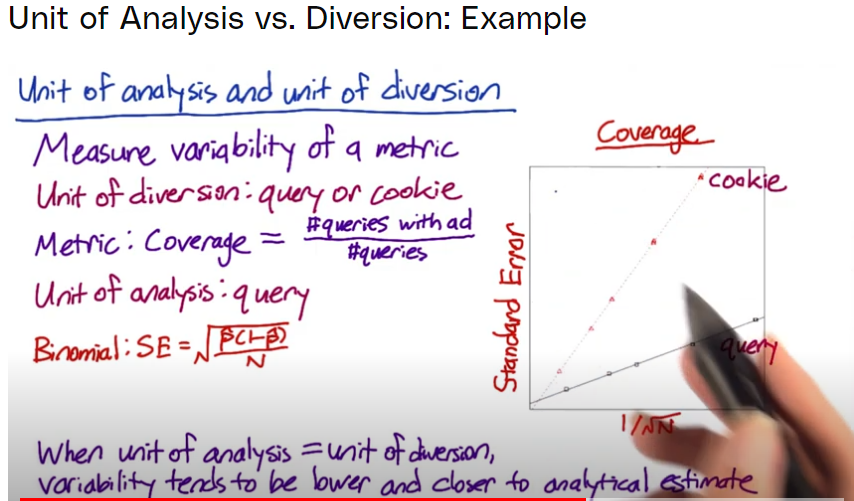

**Violations of SUTVA**:
- In the analysis of controlled experiments, it is common to apply the Stable Unit Treatment Value Assumption (SUTVA), which states that experiment units (e.g., users) do not interfere with one another.
- The assumption could clearly be violated in settings, including the following:
  - Social networks, where a feature might spillover to a user’s network.
  - Skype (a communication tool), where peer-to-peer calls can violate SUTVA.
  - Document authoring tools (e.g. MS, Google Docs)
  - Two-sided marketplaces
  - Shared resources

**Step 2: Choose “Population” (who is eligible)**

- **Inter-user experiments**: different users on A and B sides
- **Intra-user experiments**: expose the same user to this feature on and off over time, and analyze how users behave in different time windows. Note: (1) Need to choose a comparable time window. (2) With a lot of features, there might be frustration or learning problems, where users learn to use the particular features in the first two weeks, and ask why when you turn it off.
- **Rank order list** — can run interleaved experiments where you expose the same users to A and B at the same time.
- **Interleaved experiments**: Suppose you have two ranking algorithms, X and Y. Algorithm X would show results X1, X2, … XN in that order, and algorithm Y would show Y1, Y2, … YN. An interleaved experiment would show some interleaving of those results, for example, X1, Y1, X2, Y2, … with duplicate results removed. One way to measure this would be by comparing the click-through-rate or -probability of the results from the two algorithms.

**Target Population**: Need to decide in advance who you are targeting in your users — there are some easy divisions to consider, such as browsers, geo locations, country, language, etc.
- High profile launch — want to restrict the number of people who see it before the official launch to avoid press coverage.
- If we want to run internationally, need to check if the language is correct.
- Avoid overlapping between various experiments
- **Only run your experiment on the affected traffic. Filtering the traffic might affect the variability as well. Running the experiment with global data with unaffected population included might dilute the changes.**

**Cases in which don’t choose particular traffic**:
- Want to test the effect across the global population as not sure if you can target correctly
- 90% of the total traffic might be affected, and does not worth the trouble to find the specific target
- Need to check with the engineering team to better understand the features. Concern for potential interactions so that we might want to run a global experiment.
- Use the same filters for the target and untargeted of the experiments.
- Before launching a big change, run a global experiment to make sure you do not have an unintentional effect on the traffic you were not targeting

**Population and Cohort**
- Cohorts: a subset of populations for users entering the experiment at the same time
- Define an “entering class”, and only look at users entering both sides at the same time.
- Can also use other information to define cohort — e.g. users who have been using your site consistently for 2 months, users with both laptop and mobile associated with their user ID, etc.
- Typically, cohorts are used when looking for user stability (e.g. measure learning effects, examine user retention, increase user activity, anything requiring users to be established), when you want to observe how your change affects users’ behaviors instead of their history.
- Cannot choose the cohorts who have started the courses before the experiment — they may have completed the course. lesson already. Cannot choose the cohorts before the experiment starts for control either — there might be some other system changes that affect the experience. ➡️ Choose cohorts of users that start after the course after the experiment starts, and split them between control and experiment groups.

**Size**
- How to reduce the size of an experiment: (1) Increase α，β or d_min；(2) make the unit of diversion and unit of analysis the same; 3) shrink it to specific traffic that is only affected, exclude the traffic that will dilute the experiment effect
- There might be cases in which you don’t know which fraction of the population is going to be affected by the changes of the feature — need to be conservative about the time needed for the experiment. Can run a pilot experiment, or just observe the experiment for the first couple of weeks to check which fraction is affected.
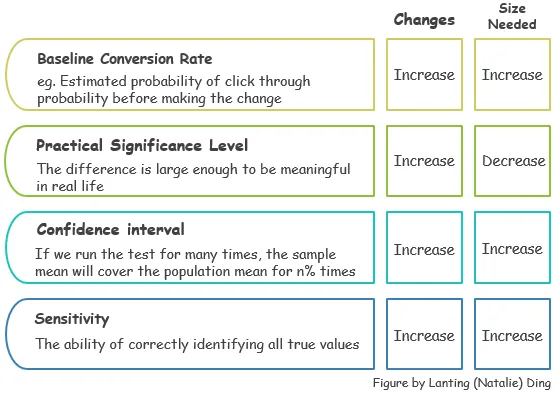

**Duration and Exposure**:
- The duration of the experiment is related to the percentage of traffic you are sending to experiment and control each day. More traffic per day, less time.
- Safety consideration: e.g. new feature and not sure how users will react. So keep the site the same to most people and only expose it to a small portion of people.
- Run a small percentage on every day including weekdays and weekends, instead of a single day (especially holidays) to account for other sources of variability.

**Learning Effect — Users adapt to the changes.**
- Choose the unit of diversion correctly to capture this, such as user id and cookie.
- Learning is also about how often (dosage) users see the change. Use a cohort instead of the entire population, based on how often they have been exposed to the change or how long they have seen it.
- For a high-risk change, run through a small portion of users over a longer period of time.
- Pre-period and post-period: A/A tests before and after the experiment. Differences observed in the post-period can attribute to the learning effect.

# Variant Assignment

- **Single-Layer Method**
  - The Single-Layer (also called a numberline) method is simple and allows multiple experiments to run simultaneously (each user is only in a single experiment). It is a plausible choice in early maturity phases when few experiments run concurrently; however, the main drawback is the limitation on the number of concurrent experiments, as you must ensure that each experiment has enough traffic for adequate power.
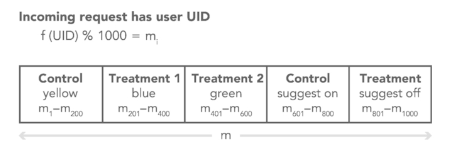

- **Concurrent Experiments**
  - To scale experimentation beyond what is possible in a Single-Layer method, you need to move to some sort of concurrent (also called overlapping) experiment system, where each user can be in multiple experiments at the same time. One way to achieve this is to have multiple experiment layers where each layer behaves like the Single-Layer method. To ensure orthogonality of experiments across layers, in the assignment of users to buckets, add the layer ID. This is also where you would add, as in the experiment specification discussed above, the layer ID (or some other way of specifying constraints).
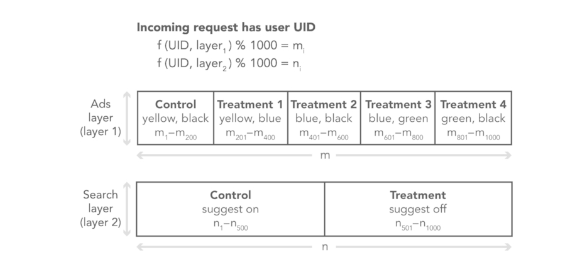
  - One possibility is to extend a full factorial experiment design into a full factorial platform design. In a full factorial experiment design, every possible combination of factors is tested as a variant. If we extend that to a platform, then a user is in all experiments simultaneously: the user is assigned to a variant (Control or any of the Treatments) for every experiment running. Each experiment is associated with a unique layer ID, so all experiments are orthogonal to each other. The main drawback of this platform design is that it does not avoid potential collisions, where certain Treatments from two different experiments give users a poor experience if they coexist. That said, a factorial platform design might be preferred if the reduction on statistical power when splitting up traffic outweighs the potential concern of interaction.
  - In a nested design, system parameters are partitioned into layers so that experiments that in combination may produce a poor user experience must be in the same layer and be prevented by design from running for the same user. For example, there might be one layer for the common UI elements (e.g., the header of the page and all information in the header), another layer for the body, a third layer for back-end systems, a fourth layer for ranking parameters, and so on. A constraints-based design has experimenters specify the constraints and the system uses a graph-coloring algorithm to ensure that no two experiments that share a concern are exposed to the user.

# Step 3: Analyzing Results
- **Sanity Check**
  - Unit of diversion — experiment and control should be comparable
  - Set up filters consistently between experiment and control
  - Is the data capture setup accurately capturing the events you are looking for?
  - Sample Ratio Mismatch (SRM): If the ratio of users (or any randomization unit) between the variants is not close to the designed ratio, the experiment suffers from a Sample Ratio Mismatch (SRM).
    - **Browser redirects.**:A very common and practical mechanism to implement an A/B test is to redirect the Treatment to another page. Like many ideas, it is simple, elegant, and wrong; several different attempts have shown that this consistently causes an SRM.
      - Performance differences. Users in the Treatment group suffer an extra redirect, which may appear fast in the lab, but delays for users may be significant, on the order of hundreds of milliseconds, which has a significant impact on key metrics
      - Bots. Robots handle redirects differently: some may not redirect on the http-equiv=“REFRESH” meta tag; some will tag this as a new page worthy of deep crawling and crawl it more often.
      - Redirects are asymmetric. When users are redirected to the Treatment page, they may bookmark it or pass a link to their friends. In most implementations, the Treatment page does not check that the user should really have been randomized into the Treatment, so this causes contamination.
    - **Lossy instrumentation**: Click tracking is typically done using web beacons (typically a 1x1 GIF sent to the server to signal a click), which is known to be lossy (i.e., not 100% of clicks are properly recorded). This is not normally an issue, as the loss is similar for all variants, but sometimes the Treatment can impact the loss rate, making low-activity users (e.g., those who only had a single click) appear at a different rate and cause an SRM. When the web beacon is placed in a different area of the page, timing differences will skew the instrumentation.
    - **Bad hash function for randomization**:Triggering impacted by Treatment: It is common to only trigger a segment of users into an experiment. For example, you may only trigger users in a certain country, say the US. These users are then randomly split into variants. If triggering is done based on attributes that are changing over time, then you must ensure that no attributes used for triggering could be impacted by the Treatment. For example, assume you run an e-mail campaign that triggers users who have been inactive for three months. If the campaign is effective, those users become active and the next iteration of the campaign could have an SRM.
    - **Time-of-Day Effects**: E.g. E-mails were first sent to Control users and then to Treatment users—the first group received the e-mails during work hours, whereas the second group received them after work.
    - **Data pipeline impacted by Treatment: e.g. Bot filtering**
    - **Residual or carryover effects**:It is common for a new experiment to cause some unexpected egregious issue and be stopped or kept running for a quick bug fix. After the bug is fixed, the experiment continues, but some users were already impacted. In some cases, that residual effect could be severe and last for months. This is why it is important to run pre-experiment A/A tests and proactively re-randomize users, recognizing that in some cases the re-randomization breaks the user consistency, as some users bounce from one variant to another.
      - Residual information in browser cookies can impact experiments. If the experiment is restarted, some Treatment users will have the cookie with a count > 0, and thus will either see fewer impressions or none at all, diluting the Treatment effect or creating an SRM.
- **Use guardrail metrics or invariants to do sanity check — two types**:
  - Population sizing metrics based on unit of diversion. The experiment population and control population should be comparable.
  - Other invariants — the metrics that shouldn’t change in your experiment. Test if these metrics change or not.

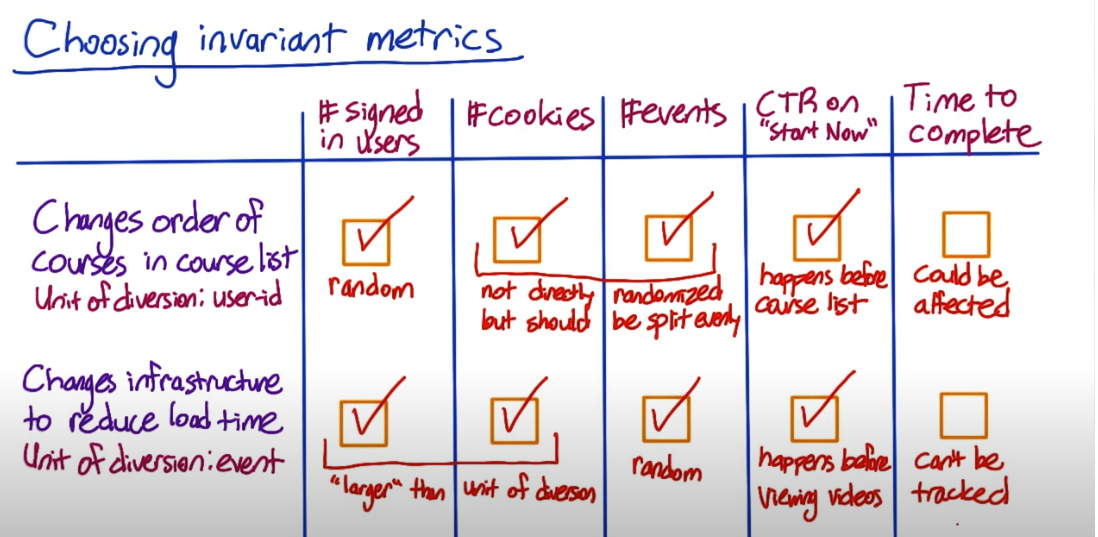

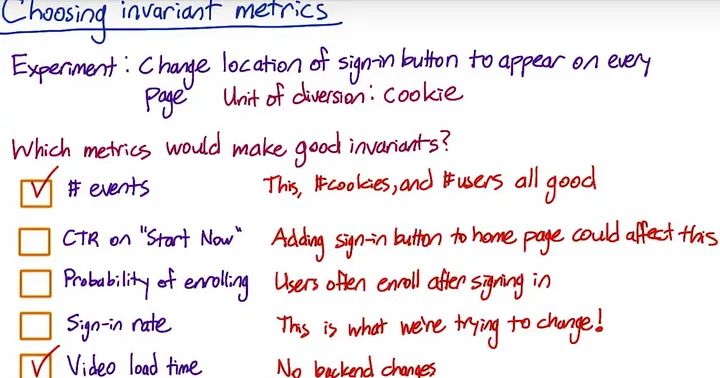

**Given**: Each cookie is randomly assigned to the control or experiment group with probability p = 0.5. 
- Use this to compute SE of binomial with probability 0.5 of success (being in control). 
- Multiply by z score to get Margin of error
- Calculate the confidence interval around 0.5 (not onserved proportion as we know actual probability)
- if the observed fraction of control group is greater than the upper bound of CI => there is something wrong with the setup.

- **Do day-by-day analysis**. If control group samples are more on a lot of dates, not just a specific day, we can:
  - Talk to the engineers about experiment infrastructure, unit of diversion, etc.
  - Try slicing to see if one particular slice is weird, e.g. country, language, platform. 
  - Check the age of cookies — does one group have more new cookies 
  - Retrospective analysis: recreate the experiment diversion from the data capture to understand the problem. 
  - Pre- and post-period: check invariant. If similar changes exist on the pre-period, it could be problems with the experiment infrastructure (e.g. cookie reset), setup (e.g. not filter correctly between groups), etc. If the changes are only observed in the post-period, the issue may be associated with the experiment itself such as data capture (e.g. capture correctly in trt but not in control). Learning effect may take time. If the issues are observed at the beginning of the experiment, might not be learning effect.

**A Single Metric**: 
  - See if there’s a significant difference. If not as expected, break/slice and check the results. It helps with debugging the experiment setup, and get new hypotheses.
  - **Simpson Paradox**. Although for each subgroup it seems that CTR has improved, the overall CTR was not improved. We cannot say the experiment is successful. Need to dig deeper to understand what caused the difference between new users and experienced users.
    - If an experiment goes through ramp-up that is, two or more periods with different percentages assigned to the variants, combining the results can result in directionally incorrect estimates of the Treatment effects, that is, Treatment may be better than Control in the first phase and in the second phase, but worse overall when the two periods are combined. This phenomenon is called Simpson’s paradox because it is unintuitive
    - 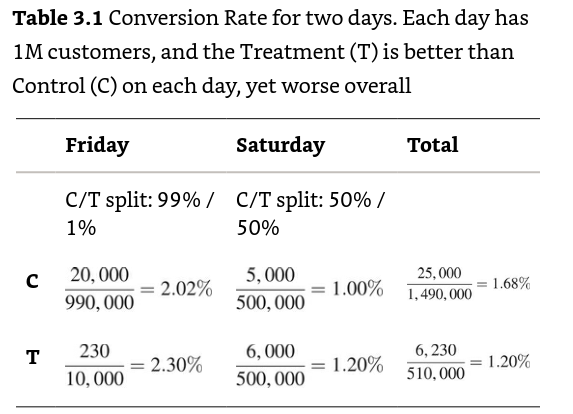



**Multiple Metrics**
 - **Multiple comparison problem**:As you test more metrics, it becomes more likely that one of them will show a statistically significant result by chance.
   - In other words, the probability of any false positive increases as you increase the number of metrics.
   - For example, when we measure 3 independent metrics at the same time, alpha = 0.05, the probability that at least one metric by chance to be significant (False Positive) is `P(FP=0) = 0.95*0.95*0.95 = 0.857`, `P(FP≥1) = 1-P(FP=0) = 1–0.857 = 0.143.`
   - Solution: Use a higher confidence level for each metric
   - Method 1: Set up an overall alpha and use it to calculate each individual alpha. Assume independence. $\alpha_{overall} = 1-(1-alpha_{individual})^n$.
   - Method 2: Bonferroni correction. $\alpha_{individual} = \alpha_{overall}/n$
   - ❗️A problem with Bonferroni correction is, if our metrics are correlated, they tend to move at the same time. In this way, the method is too conservative — it results in less significant difference.
   - Solution: 
     - Use false discovery rate (FDR = E(# false positives/#rejections) instead of family-wise error rate (FWER, control probability that any metric shows a false positive) 
     - Use less conservative multiple comparison methods, e.g. closed testing procedure, Boole-Bonferroni bound, and Holm-Bonferroni method.

**Focus on Business Goals**
- Overall evaluation criteria (OEC) should be established based on an understanding of what your company is doing and what the problems are. It should balance long-term and short-term benefits. Business analysis is needed to make the decision. Once you have some candidates of OEC, you can run a few experiments to see how they steer you (whether in the right direction).

**Whether to launch an experiment or not??**
- Statistically and practically significant to justify the change?
- Do you understand what the change can do to the user experience?
- Is it worth the investment?

**Ramp up AB test**
- In practice, it is common that an experiment goes through a ramping process to control unknown risks associated with new feature launches (aka. controlled exposure). For example, a new feature may start by exposing the Treatment to only a small percentage of users. If the metrics look reasonable and the system scales well, then we can expose more and more users to the Treatment. We ramp the traffic until the Treatment reaches desired exposure level.
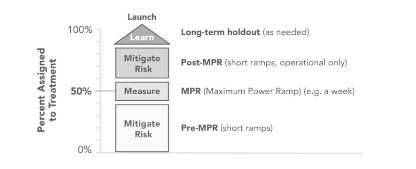
- To measure the impact and Return-On-Investment (ROI) of the Treatment if it launched to 100%. If the only reason to run a controlled experiment is to measure, we could run the experiment at the maximum power ramp (MPR), which often means a 50% traffic allocation to the Treatment providing the highest statistical sensitivity, assuming our goal is to ramp that Treatment to 100%. This gives us the fastest and the most precise measurement.
- To reduce risk by minimizing damage and cost to users and business during an experiment (i.e., when there is a negative impact). 
- To learn about users’ reactions, ideally by segments, to identify potential bugs, and to inform future plans. This is either as part of running any standard experiments, or when running experiments designed for learning. While learning should be part of every ramp, we sometimes conduct a long-term holdout ramp, where a small fraction (e.g., 5–10%) of users do not receive the new Treatment for a period of time (e.g., two months) primarily for learning purposes. The goal is to learn whether the impact measured during MPR is sustainable in the long term.
- 1 If the experiment has the entire 100% traffic with only one Treatment, the variance in the two-sample t-test is proportional to 1/q(1 − q), where q is the treatment traffic percentage. The MPR in this case has a 50/50 traffic allocation. If there is only 20% traffic available to experiment between one Treatment and one Control, the MPR has a 10/10 split, and so on. If there are four variants splitting 100% traffic, then each variant should get 25%.


- Start with 1% of the traffic and divert to experiment and increase that until the feature is fully launched.
- During the ramp-up process, effects may not be statistically significant even they are significant before. 
- Reason:
  - Seasonality such as school season, holiday, etc. 🌟 Solution: have a holdback group (launch the experiment to everyone except for a small holdback who don’t get the change, and you continue to compare them to the control)
  - Novelty effect or change aversion: as users discover or change their adoption of your change, their behavior can change and measured effect can change — can do cohort analysis. 🌟Solution: Pre- and post-period analysis with cohort analysis to understand learning effect — i.e. how users adapt to the changes over time.
- Business-wise, need to consider the engineering cost of maintaining the change, if there are customer support or sales issue, opportunity cost, etc.

## 2 Experiment Overview <a class="anchor" id="overview"></a>

**Experiment Name:** "Free Trial" Screener. <br>
It is conducted by Udacity, a website dedicated to teaching online - with the overall business goal of maximizing course completion by students.
### 2.1 Current Conditions Before Change <a class="anchor" id="current"></a>
* At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". <br>
* If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first.
* If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


### 2.2 Description of Experimented Change <a class="anchor" id="description"></a>

* In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.
* If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.
* At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. [This screenshot](https://drive.google.com/file/d/0ByAfiG8HpNUMakVrS0s4cGN2TjQ/view) shows what the experiment looks like.

### 2.3 Experiment Hypothesis <a class="anchor" id="hypothesis"></a>
The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

### 2.4 Experiment Details <a class="anchor" id="details"></a>
The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

## 3 Metric Choice <a class="anchor" id="metric"></a>
We need two types of metrics for a successful experiment (or at least, a safe one); Invariate and evaluation metrics.
Invariate metrics are used for "sanity checks", that is, to make sure our experiment (the way we presented a change to a part of the population, as well as the way we collected the data) is not inherently wrong. Basically, this means we pick metrics which we consider not to change (not to be affected) because of our experiment and later make sure these metrics don't change drastically between our control and experiment groups.<br>
Evaluation metrics on the other hand, are the metrics in which we expect to see a change, and are relevant to the business goals we aim to achieve. For each metric we state a $Dmin$ - which marks the minimum change which is practically significant to the business. For instance, stating that any increase in retention that is under 2%, even if statistically significant, is not practical to the business.
### 3.1 Invariate Metrics - Sanity Checks <a class="anchor" id="invariate"></a>

| Metric Name  | Metric Formula  | $Dmin$  | Notation |
|:-:|:-:|:-:|:-:|
| Number of Cookies in Course Overview Page  | # unique daily cookies on page | 3000 cookies  | $C_k$ |
| Number of Clicks on Free Trial Button  | # unique daily cookies who clicked  | 240 clicks | $C_l$ |
| Free Trial button Click-Through-Probability  | $\frac{C_l}{C_k}$ | 0.01  | $CTP$ | 

### 3.2 Evaluation Metrics - Performance Indicators <a class="anchor" id="evaluation"></a>
| Metric Name  | Metric Formula  | $Dmin$  | Notation |
|:-:|:-:|:-:|:-:|
| Gross Conversion   |  $\frac{enrolled}{C_l}$  | 0.01  | $Conversion_{Gross}$ |
| Retention   | $\frac{paid}{enrolled}$  | 0.01  | $Retention$ |
| Net Conversion  |  $\frac{paid}{C_l}$  | 0.0075 | $Conversion_{Net}$ |

## 4 Estimating the baseline values of metrics <a class="anchor" id="baseline"></a>
Before we start our experiment we should know how these metrics behave before the change - that is, what are their baseline values.
### 4.1 Collecting estimators data <a class="anchor" id="collect"></a>
Udacity gives the following rough estimates for these metrics (presumably collected from aggregates on daily traffic) <br>

| Item | Description  | Estimator  |
|:-:|:-:|:-:|
| Number of cookies | Daily unique cookies to view course overview page  | 40,000  |
| Number of clicks | Daily unique cookies to click Free Trial button  | 3,200 |
| Number of enrollments | Free Trial enrollments per day  | 660  |
| CTP | CTP on Free Trial button  | 0.08  |
| Gross Conversion | Probability of enrolling, given a click  | 0.20625  |
| Retention | Probability of payment, given enrollment  | 0.53  |
| Net Conversion | Probability of payment, given click  | 0.109313 |

In [4]:
#Let's place this estimators into a dictionary for ease of use later
baseline = {"Cookies":40000,"Clicks":3200,"Enrollments":660,"CTP":0.08,"GConversion":0.20625,
           "Retention":0.53,"NConversion":0.109313}
baseline

{'Cookies': 40000,
 'Clicks': 3200,
 'Enrollments': 660,
 'CTP': 0.08,
 'GConversion': 0.20625,
 'Retention': 0.53,
 'NConversion': 0.109313}

### 4.2 Estimating Standard Deviation <a class="anchor" id="sd"></a>
Once we collected these estimates, we should estimate the standard deviation of a metric, this is computed for sample size calculations and confidence intervals for our results. The more variant a metric is, the harder it is to reach a significant result. Assuming a sample size of 5,000 cookies visiting the course overview page per day (as given in project's instructions) - we want to estimate a standard deviation, for the evaluation metrics only. The sample size we are considering should be smaller than the "population" we collected and small enough to have two groups with that size.

#### 4.2.1 Scaling Collected Data <a class="anchor" id="scale"></a>
For all the calculations to follow we need to scale our collected counts estimates of metrics with the sample size we specified for variance estimation. In this case, from 40000 unique cookies to visit the course overview page per day, to 5000.

In [5]:
#Scale The counts estimates
baseline["Cookies"] = 5000
baseline["Clicks"]=baseline["Clicks"]*(5000/40000)
baseline["Enrollments"]=baseline["Enrollments"]*(5000/40000)
baseline

{'Cookies': 5000,
 'Clicks': 400.0,
 'Enrollments': 82.5,
 'CTP': 0.08,
 'GConversion': 0.20625,
 'Retention': 0.53,
 'NConversion': 0.109313}

#### 4.2.2 Estimating Analytically <a class="anchor" id="estimate"></a>
In order to estimate variance analytically, we can assume metrics which are probabilities ($\hat{p}$) are binomially distributed, so we can use this formula for the standard deviation: <br>
<center><font size="4">$SD=\sqrt{\frac{\hat{p}*(1-\hat{p})}{n}}$</font></center><br>
This assumption is only valid when the **unit of diversion** of the experiment is equal to the **unit of analysis** (the denominator of the metric formula). In the cases when this is not valid, the actual variance might be different and it is recommended to estimate it empirically.

For each metric, we need to plug two variables into the formula: <br>
$\hat{p}$ - baseline probability of the event to occur <br>
$ n $ - sample size <br>


* **Gross Conversion** - The baseline probability for Gross Conversion can be calculated by the number of users to enroll in a free trial divided by the number of cookies clicking the free trial. In other words, the probability of enrollment given a click. In this case, the unit of diversion (Cookies), that is the element by which we differentiate samples and assign them to control and experiment groups, is equall to the unit of analysis (cookies who click), that is the denominator of the formula to calculate Gross Conversion (GC). When this is the case, this analytic estimate of variance is sufficient.


In [8]:
# Let's get the p and n we need for Gross Conversion (GC)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
import numpy as np
GC={}
GC["d_min"]=0.01
GC["p"]=baseline["GConversion"]
#p is given in this case - or we could calculate it from enrollments/clicks
GC["n"]=baseline["Clicks"]
GC["sd"]=round(np.sqrt((GC["p"]*(1-GC["p"]))/GC["n"]),4)
GC["sd"]

0.0202

* **Retention** - The baseline probability for retention is the number of paying users (enrolled after 14 free days) divided by the number of total enrolled users. In other words, the probability of payment, given enrollment. The sample size is the number of enrolled users. In this case, unit of diversion is not equal to unit of analysis (users who enrolled) so an analytical estimation is not enough - if we had the data for these estimates, we would want to estimate this variance empirically as well.

In [10]:
# Let's get the p and n we need for Retention(R)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
R={}
R["d_min"]=0.01
R["p"]=baseline["Retention"]
R["n"]=baseline["Enrollments"]
R["sd"]=round(np.sqrt((R["p"]*(1-R["p"]))/R["n"]),4)
R["sd"]

0.0549

* **Net Conversion** - The baseline probability for the net conversion is the number of paying users divided by the number of cookies that clicked the free trial button. In other words, the probability of payment, given a click. The sample size is the number of cookies that clicked. In this case, the unit of analysis and diversion are equal so we expect a good enough estimation analytically.

In [13]:
# Let's get the p and n we need for Net Conversion (NC)
# and compute the Standard Deviation (sd) rounded to 4 decimal digits.
NC={}
NC["d_min"]=0.0075
NC["p"]=baseline["NConversion"]
NC["n"]=baseline["Clicks"]
NC["sd"]=round(np.sqrt((NC["p"]*(1-NC["p"]))/NC["n"]),4)
NC["sd"]

0.0156

## 5 Experiment Sizing <a class="anchor" id="sizing"></a>
At this point, once we have estimated our metrics in the baseline (most importantly, their estimated variance) we cancalculate the munumal number of samples we need so that our experiment will have enough statistical power, as well as siginificance.

Given $\alpha=0.05$ (significance level ) and $\beta=0.2$ (power), we want to estimate how many total pageviews (cookies who viewed the course overview page) we need in the experiment. This amount will be divided into tthe two groups: control and experiment. This calculation can be done using an [online calculator](http://www.evanmiller.org/ab-testing/sample-size.html) or by calculating directly using the required formula.

The minimum sample size for control and experiment groups, which provides probability of Type I Error $\alpha$, Power $1-\beta$, detectable effect $d$ and baseline conversion rate $p$ (simple hypothesis $H_0 : P_{cont} - P_{exp} = 0$ against simple alternative $H_A : P_{cont} - P_{exp} = d$  is:

<center> <font size="5"> $n = \frac{(Z_{1-\frac{\alpha}{2}}sd_1 + Z_{1-\beta}sd_2)^2}{d^2}$</font>, with: <br><br>
$sd_1 = \sqrt{p(1-p)+p(1-p)}$<br><br>
$sd_2 = \sqrt{p(1-p)+(p+d)(1-(1-(p+d))}$ </center><br>

Now, let's break down what inputs we need and which calculations still need to be made. Regarding inputs, we have all the data we need:
Type 1 error ($\alpha$), power ($1-\beta$), detectable change ($d = D_{min}$) and baseline conversion rate (our $\hat{p}$ ).
What we need to calculate: 
* Get Z score for $1-\frac{\alpha}{2}$ and for $1-\beta$
* Get standard deviations 1 & 2, that is for both the baseline and for expected changed rate
All these components will finally yield the number we need.

### 5.1 Get z-score critical value and Standard Deviations <a class="anchor" id="side_methods"></a>
We are used to looking up this value in a table, but gladly we can use python's `scipy.stats.norm` package to get all the required methods for normal distribution. The `ppf` method gives us access to the [Percent Point Function (ppf)](https://en.wikipedia.org/wiki/Quantile_function) or Quantile Function, and besides it being the inverse of the [Cummulative Distribution Function (cdf)](https://en.wikipedia.org/wiki/Cumulative_distribution_function), this is the functions that will give back our required critical z-score.

In [20]:
#Inputs: required alpha value (alpha should already fit the required test)
#Returns: z-score for given alpha
from scipy.stats import norm
def get_z_score(alpha):
    return norm.ppf(alpha)

# Inputs p-baseline conversion rate which is our estimated p and d-minimum detectable change
# Returns
def get_sds(p,d):
    sd1=np.sqrt(2*p*(1-p))
    sd2=np.sqrt(p*(1-p)+(p+d)*(1-(p+d)))
    sds=[sd1,sd2]
    return sds

# Inputs:sd1-sd for the baseline,sd2-sd for the expected change,alpha,beta,d-d_min,p-baseline estimate p
# Returns: the minimum sample size required per group according to metric denominator
def get_sampSize(sds,alpha,beta,d):
    n=pow((get_z_score(1-alpha/2)*sds[0]+get_z_score(1-beta)*sds[1]),2)/pow(d,2)
    return n

### 5.2 Calculate Sample Size per Metric <a class="anchor" id="calc"></a>
OK! Looks like we set up all the tools required for this part. We are now going to calculate the number of samples required for the experiment per metric, and we are subected to the fact that the highest sample size will be the effective size. This size should be considered in terms of efficacy of duration and exposure: how long will it take to get this many samples for the experiment.

So, to work more easily, let's add the d parameter to each of the metrics characteristics of each metric:

In [21]:
GC["d"]=0.01
R["d"]=0.01
NC["d"]=0.0075

In [22]:
# Let's get an integer value for simplicity
GC["SampSize"]=round(get_sampSize(get_sds(GC["p"],GC["d"]),0.05,0.2,GC["d"]))
GC["SampSize"]

25835

This means we need at least 25,835 cookies who click the Free Trial button - per group! That means that if we got 400 clicks out of 5000 pageviews (`400/5000 = 0.08`) -> So, we are going to need `GC["SampSize"]/0.08 = 322,938` pageviews, again ; per group! Finally, the total amount of samples per the Gross Conversion metric is:

In [23]:
GC["SampSize"]=round(GC["SampSize"]/0.08*2)
GC["SampSize"]

645875

In [24]:
# Getting a nice integer value
R["SampSize"]=round(get_sampSize(get_sds(R["p"],R["d"]),0.05,0.2,R["d"]))
R["SampSize"]

39087

This means that we need 39,087 users who enrolled per group! We have to first convert this to cookies who clicked, and then to cookies who viewed the page, then finally to multipky by two for both groups.

In [26]:
R["SampSize"]=R["SampSize"]/0.08/0.20625*2
R["SampSize"]

4737818.181818182

This takes us as high as over 4 million page views total, this is practically impossible because we know we get about 40,000 a day, this would take well over 100 days. This means we have to drop this metric and not continue to work with it because results from our experiment (which is much smaller) will be biased.
* **Net Conversion**

In [27]:
# Getting a nice integer value
NC["SampSize"]=round(get_sampSize(get_sds(NC["p"],NC["d"]),0.05,0.2,NC["d"]))
NC["SampSize"]

27413

So, needing 27,413 cookies who click per group takes us all the way up to:

In [28]:
NC["SampSize"]=NC["SampSize"]/0.08*2
NC["SampSize"]

685325.0

We are all the way up to 685,325 cookies who view the page. This is more than what was needed for Gross Conversion, so this will be our number. Assuming we take 80% of each days pageviews, the data collection period for this experiment (the period in which the experiment is revealed) will be about 3 weeks.

## 6 Analyzing Collected Data <a class="anchor" id="analysis"></a>
Finally, the moment we've all been waiting for, after so much preparation we finally get to see what this experiment will prove!
The data is presented as two spreadsheets. I will load each spreadshot into a pandas dataframe.

### 6.1 Loading collected data <a class="anchor" id="collect_results"></a>

In [32]:
control= pd.read_excel('Book2.xlsx', sheet_name= 'Control')
experiment= pd.read_excel('Book2.xlsx', sheet_name= 'Experiment')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


### 6.2 Sanity Checks <a class="anchor" id="sanity"></a>
First thing we have to do before even beginning to analyze this experiment's results is sanity checks. These checks help verify that the experiment was conducted as expected and that other factors did not influence the data which we collected. This also makes sure that data collection was correct.

We have 3 Invariant metrics:: 
* Number of Cookies in Course Overview Page
* Number of Clicks on Free Trial Button
* Free Trial button Click-Through-Probability

Two of these metrics are simple counts like number of cookies or number of clicks and the third is a probability (CTP). We will use two different ways of checking whether these obsereved values are like we expect (if in fact the experiment was not damaged.

#### 6.2.1 Sanity Checks for differences between counts <a class="anchor" id="check_counts"></a>
* **Number of cookies who viewed the course overview page** - Starting from this simpel invariant metric, we want to count the total amount of cookie pageviews we diverted to each group and see if there is a significant difference int he amount of cookies. A significant difference will imply a biased experiment that we should not rely on it's results.

In [34]:
pageviews_cont=control['Pageviews'].sum()
pageviews_exp=experiment['Pageviews'].sum()
pageviews_total=pageviews_cont+pageviews_exp
print ("number of pageviews in control:", pageviews_cont)
print ("number of pageviewsin experiment:" ,pageviews_exp)

number of pageviews in control: 345543
number of pageviewsin experiment: 344660


In [36]:
p=0.5
alpha=0.05
p_hat=round(pageviews_cont/(pageviews_total),4)
sd=np.sqrt(p*(1-p)/(pageviews_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4988 and 0.5012 ; Is 0.5006 inside this range?


Our observed $\hat{p}$ is inside this range which means the difference in number of samples between groups is expected. So far so good, since this invariant metric sanity test passes!
* **Number of cookies who clicked the Free Trial Button**
We are going to address this count with the same strategy as before.

In [38]:
clicks_cont=control['Clicks'].sum()
clicks_exp=experiment['Clicks'].sum()
clicks_total=clicks_cont+clicks_exp

p_hat=round(clicks_cont/clicks_total,4)
sd=np.sqrt(p*(1-p)/clicks_total)
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4959 and 0.5041 ; Is 0.5005 inside this range?


We have another pass! Great, so far it still seems all is well with our experiment results. Now, for the final metric which is a probability.

#### 6.2.2 Sanity Checks for differences between probabilities <a class="anchor" id="check_prob"></a>
* ** Click-through-probability of the Free Trial Button**
In this case, we want to make sure the proportion of clicks given a pageview (our observed CTP) is about the same in both groups (since this was not expected to change due to the experiment). In order to check this out we will calculate the CTP in each group and calculate a confidence interval for the expected difference between them. 

In other words, we expect to see no difference ($CTP_{exp}-CTP_{cont}=0$), with an acceptable margin of error, dictated by our calculated confidence interval. The changes we should notice are for the calculation of the standard error - which in this case is a pooled standard error.

<center><font size="4">$SD_{pool}=\sqrt{\hat{p_{pool}}(1-\hat{p_{pool}}(\frac{1}{N_{cont}}+\frac{1}{N_{exp}})}$</font></center>
with <br> <center><font size="5"> $\hat{p_{pool}}=\frac{x_{cont}+x_{exp}}{N_{cont}+N_{exp}}$ </font></center>
We should understand that CTP is a proportion in a population (amount of events x in a population n) like the amount of clicks out of the amount of pageviews..

In [40]:
ctp_cont=clicks_cont/pageviews_cont
ctp_exp=clicks_exp/pageviews_exp
d_hat=round(ctp_exp-ctp_cont,4)
p_pooled=clicks_total/pageviews_total
sd_pooled=np.sqrt(p_pooled*(1-p_pooled)*(1/pageviews_cont+1/pageviews_exp))
ME=round(get_z_score(1-(alpha/2))*sd_pooled,4)
print ("The confidence interval is between",0-ME,"and",0+ME,"; Is",d_hat,"within this range?")

The confidence interval is between -0.0013 and 0.0013 ; Is 0.0001 within this range?


Wonderful. It seems this test has passed with flying colors as well.

### 6.3 Examining effect size <a class="anchor" id="effect"></a>
The next step is looking at the changes between the control and experiment groups with regard to our evaluation metrics to make sure the difference is there, that it is statistically significant and most importantly practically significant (the difference is "big" enough to make the experimented change beneficial to the company).

Now, all that is left is to measure for each evaluation metric, the difference between the values from both groups. Then, we compute the confidence interval for that difference and test whether or not this confidence interval is both statistically and practically significant.

* **Gross Conversion**
A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)

> **Important:** The given spreadsheet lists pageviews and clicks for 39 days, while it only lists enrollments and payments for 23 days. So, when working with enrollments and payments we should notice using only the corresponding pageviews and clicks, and not all of them.

In [41]:
# Count the total clicks from complete records only
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()

In [42]:
#Gross Conversion - number of enrollments divided by number of clicks
enrollments_cont=control["Enrollments"].sum()
enrollments_exp=experiment["Enrollments"].sum()

GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp
GC_pooled=(enrollments_cont+enrollments_exp)/(clicks_cont+clicks_exp)
GC_sd_pooled=np.sqrt(GC_pooled*(1-GC_pooled)*(1/clicks_cont+1/clicks_exp))
GC_ME=round(get_z_score(1-alpha/2)*GC_sd_pooled,4)
GC_diff=round(GC_exp-GC_cont,4)
print("The change due to the experiment is",GC_diff*100,"%")
print("Confidence Interval: [",GC_diff-GC_ME,",",GC_diff+GC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",-GC["d_min"],"is not in the CI as well.")

The change due to the experiment is -2.06 %
Confidence Interval: [ -0.0292 , -0.012 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if -0.01 is not in the CI as well.


According to this result there was a change due to the experiment, that change was both statistically and practically significant. 
We have a negative change of 2.06%, when we were willing to accept any change greater than 1%. This means the Gross Conversion rate of the experiment group (the one exposed to the change, i.e. asked how many hours they can devote to studying) has decreased as expected by 2% and this change was significant. This means  less people enrolled in the Free Trial after due to the pop-up. 
* **Net Conversion** 
The hypothesis is the same as before just with net conversion instead of gross. At this point we expect the fraction of payers (out of the clicks) to decrease as well.

In [43]:
#Net Conversion - number of payments divided by number of clicks
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=np.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")

The change due to the experiment is -0.49 %
Confidence Interval: [ -0.0116 , 0.0018000000000000004 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 0.0075 is not in the CI as well.


In this case we got a change size of less than a 0.5%, a very small decrease which is not statistically significant, and as such not practically significant.

## 6.4 Double check with Sign Tests <a class="anchor" id="sign_tests"></a>
In a sign test we get another angle at analyzing the results we got - we check if the trend of change we observed (increase or decrease) was evident in the daily data. We are goint to compute the metric's value per day and then count on how many days the metric was lower in the experiment group and this will be the number of succssesses for our binomial variable. Once this is defined we can look at the proportion of days of success out of all the available days.

### 6.4.1 Data Preparation <a class="anchor" id="prep"></a>

In [44]:
#let's first create the dataset we need for this:
# start by merging the two datasets
full=control.join(other=experiment,how="inner",lsuffix="_cont",rsuffix="_exp")
#Let's look at what we got
full.count()

Date_cont           37
Pageviews_cont      37
Clicks_cont         37
Enrollments_cont    23
Payments_cont       23
Date_exp            37
Pageviews_exp       37
Clicks_exp          37
Enrollments_exp     23
Payments_exp        23
dtype: int64

In [45]:
#now we only need the complete data records
full=full.loc[full["Enrollments_cont"].notnull()]
full.count()

Date_cont           23
Pageviews_cont      23
Clicks_cont         23
Enrollments_cont    23
Payments_cont       23
Date_exp            23
Pageviews_exp       23
Clicks_exp          23
Enrollments_exp     23
Payments_exp        23
dtype: int64

In [46]:
# We need a 1 if the experiment value is greater than the control value=
x=full['Enrollments_cont']/full['Clicks_cont']
y=full['Enrollments_exp']/full['Clicks_exp']
full['GC'] = np.where(x<y,1,0)
# The same now for net conversion
z=full['Payments_cont']/full['Clicks_cont']
w=full['Payments_exp']/full['Clicks_exp']
full['NC'] = np.where(z<w,1,0)
full.head()

,Date_cont,Pageviews_cont,Clicks_cont,Enrollments_cont,Payments_cont,Date_exp,Pageviews_exp,Clicks_exp,Enrollments_exp,Payments_exp,GC,NC
0,"Sat, Oct 11",7723,687,134.0,70.0,"Sat, Oct 11",7716,686,105.0,34.0,0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,"Sun, Oct 12",9288,785,116.0,91.0,0,1
2,"Mon, Oct 13",10511,909,167.0,95.0,"Mon, Oct 13",10480,884,145.0,79.0,0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,"Tue, Oct 14",9867,827,138.0,92.0,0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,"Wed, Oct 15",9793,832,140.0,94.0,0,1


In [47]:
GC_x=full.GC[full["GC"]==1].count()
NC_x=full.NC[full["NC"]==1].count()
n=full.NC.count()
print("No. of cases for GC:",GC_x,'\n',
      "No. of cases for NC:",NC_x,'\n',
      "No. of total cases",n)

No. of cases for GC: 4 
 No. of cases for NC: 10 
 No. of total cases 23


### 6.4.2 Building a Sign Test <a class="anchor" id="sign"></a>
We can forget all about this part and just use an [online sign test calculator](https://www.graphpad.com/quickcalcs/binomial2/), but for me that is just no fun - so I will implement the calculations behind it. <br>
What we want to do after we count the amount of days in which the experiment group had a higher metric value than that of the control group, is to see if that number is likely to be seen again in a new experiment (significance). We assume the chance of a day like this is random (50% chance to happen) and then use the binomial distribution with $p=0.5$ and the number of experiments (days) to tell us the probability of this happening according to a random chance.<br>
So, according to the binomial distribution with $p=0.5$ and $n=$total number of days; we want to now the probability of $x$ days being a success (higher metric value in experiment). Because we are doing a two-tailed test we want to double this probability and once we have we can call it the $p-value$ and compare it to our $\alpha$. If the $p-value$ is greater than the $\alpha$ the result is not significant and vice-versa.<br>
<center><font size="4"> $p(successes )=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$ </font></center>
Recall that a $p-value$ is the probability of observing a test statistic as or more extreme than that observed. If we observed 2 days like that, the $p-value$ for the test is: $p-value = P(x <= 2)$. We only need to remember the following:<br>
<center>$P(x<=2)=P(0)+P(1)+P(2)$.</center><br>For more detailed information, visit [this excellent page](http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric5.html).


In [53]:
#first a function for calculating probability of x=number of successes
def get_prob(x,n):
    p=round(np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))*0.5**x*0.5**(n-x),4)
    return p
#next a function to compute the pvalue from probabilities of maximum x
def get_2side_pvalue(x,n):
    p=0
    for i in range(0,x+1):
        p=p+get_prob(i,n)
    return 2*p

Finally, to conduct the sign test itself: we will calculate the p-value for each metric, using the counts `GC_x`,`NC_x` and `n` and the function `get_2side_pvalue`.

In [54]:
print ("GC Change is significant if",get_2side_pvalue(GC_x,n),"is smaller than 0.05")
print ("NC Change is significant if",get_2side_pvalue(NC_x,n),"is smaller than 0.05")

GC Change is significant if 0.0026000000000000003 is smaller than 0.05
NC Change is significant if 0.6774 is smaller than 0.05


We get the same conclusions as we got from our effect size calculation: the change in Gross conversion was indeed significant, while the change in Net conversion was not.

## 7 Conclusions & Recommendations <a class="anchor" id="conclusions"></a>
At this point, once we have seen that the actual underlying goal we had was not reached (increase fraction of paying users by asking them in advance if they have the time to invest in the course), we can only recommend to not continue with change. It may have caused a change in Gross conversion, but it didn't for net conversion.

In [4]:
df= pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [7]:
df[df['converted']==1].count()/ df['user_id'].count()

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### Part 2
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

In [11]:
#df2= df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page') | df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]]

In [12]:
df_01 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_02 = df[(df.group == 'control') & (df.landing_page == 'old_page')] 
frames = [df_01, df_02]
df2 = pd.concat(frames)

In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


### Remove duplicates 

**a.** How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.loc[df2['user_id'].duplicated(), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2.loc[df2['user_id'].duplicated(keep= False), :]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2['timestamp'].replace('2017-01-14 02:55:59.590927', '2017-01-09 05:37:58.781806', inplace = True)
# Check again if the row with a duplicate user_id is deleted or not


In [18]:
df2.drop_duplicates(inplace = True)

In [19]:
df2.loc[df2['user_id'].duplicated(), :]

,user_id,timestamp,group,landing_page,converted


In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


### Calculate the actual difference (obs_diff) between the conversion rates for the two groups. 
**a.**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [24]:
df2['converted'].value_counts()[1]/ df2['user_id'].count()

0.11959667567149027

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
p1=len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'control'])
p1

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
p2=len(df2[(df2['group']== 'treatment') & (df2['converted']==1)])/len(df2[df2['group']=='treatment'])
p2

0.11880724790277405

In [27]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= p2-p1
obs_diff

-0.0015790565976871451

**d.** What is the probability that an individual received the new page?

In [28]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000636646764286

1. There is a slightly higher number of people that converted in the control group as opposed to the treatment group.
2. The percentage of converted in the control group is 12.038% and converted in the treatment group is 11.880%.
3. Not sure if there is a signifcant difference.

<a id='ab_test'></a>
## Part II - A/B Test

**$H_0$** :**$p_{new}$**<= **$p_{old}$**

**$H_1$**: **$p_{new}$**> **$p_{old}$**


Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 
- Use a sample size for each group equal to the ones in the `df2` data.
- Compute the difference in the "converted" probability for the two samples above. 
- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [29]:
p_new=len(df2[df2['converted']==1])/len(df2)
p_new

0.11959667567149027

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [30]:
p_old=len(df2[df2['converted']==1])/len(df2)
p_old

0.11959667567149027

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [31]:
n_new=len(df2[df2['group']== 'treatment'])
n_new

145311

**d.** What is $n_{old}$, the number of individuals in the control group?

In [32]:
n_old=len(df2[df2['group']== 'control'])
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [33]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1, 0], n_new, p = [p_new, 1-p_new])
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [34]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1, 0], n_old, p = [p_old, 1-p_old])
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [35]:
new_page_converted.mean() - old_page_converted.mean()

-0.00018228954841542633


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [22]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.
Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


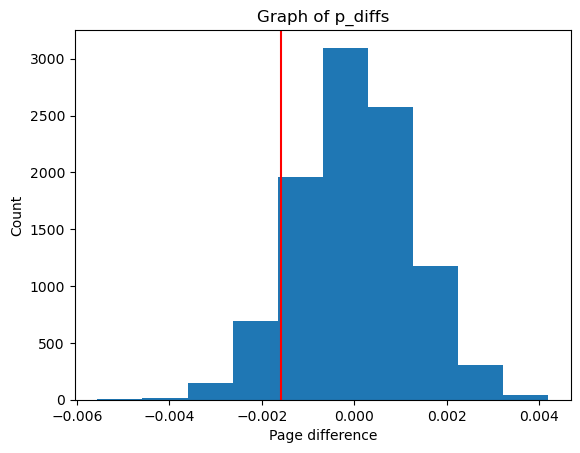

In [36]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs)
plt.title('Graph of p_diffs')
plt.xlabel('Page difference')
plt.ylabel('Count')
plt.axvline(x= obs_diff, color='r')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [37]:
var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
actual_diff

-0.0015790565976871451

In [38]:
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.9034


1. We computed the actual difference versus observed difference in means of converted old page and converted new page.
2. This means that we had random choices of these mean converted values for the observed difference, which is stored in p_diffs.
3. The actual difference was calculated from the dataset ab_data.csv. This value that we calculated, difference in means, is the p-value.
4. Our p-value is exceeds the critical value of 0.05 in this case and hence we fail to reject the null hypothesis: we cannot conclude that the new page converts more users than the old page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [39]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])
print(convert_old)

# number of conversions with the new_page
convert_new = len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)])
print(convert_new)

# number of individuals who were shown the old_page
n_old = len(df2[df2['group']== 'control'])
print(n_old)

# number of individuals who received new_page
n_new = len(df2[df2['group']== 'treatment'])
print(n_old)

17489
17264
145274
145274


In [40]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
print(convert_old)

# number of conversions with the new_page
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
print(convert_new)

# number of individuals who were shown the old_page
n_old = len(df2[df2['group']== 'control'])
print(n_old)

# number of individuals who received new_page
n_new = len(df2[df2['group']== 'treatment'])
print(n_old)

17489
17264
145274
145274


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 
---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

In [41]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='larger')
print(z_score, p_value)

1.3116075339133115 0.09482629485940902


In [42]:
from scipy.stats import norm
norm.cdf(z_score) # area under the curve left side

0.905173705140591

In [43]:
1-0.9050583127590245 # p value for right tailed test

0.09494168724097551

In [44]:
norm.ppf(0.95) #critical value of 95% confidence

1.6448536269514722

1. The z-score of 1.311 is less than critical value at 95% confidence interval, 1.640, so it falls within the confidence interval range of 95%. We fail to reject the null hypothesis; the old page converted same or more users than the new page.
2. Old Page (17489/145274) is statistically different and slightly better than New Page (17264/145310). However, we would expect their long-term performance to be different from one another.These values agree with the findings in parts j. and k as the calculated values align with those obtained during the bootstrapped hypothesis testing done above.

# How to Measure Website Performance

1. The user makes a request at time T0, say typing a query into the browser address bar or search box and hitting return or clicking on the magnifying glass. 
2. The request takes time to reach the server, and it arrives at time T1. T1−T0 seems extremely hard to estimate, but there is a nice trick we can deploy that we explain after this numbered list. 
3. On receiving the request, the server typically sends the first chunk of HTML to the client, time T2. This first chunk is independent of the request (e.g., query or URL parameters), so can be served quickly. It typically contains the basic page elements,such as the header, navigation elements, and JavaScript functions. Providing the user with visible feedback that the request was received is beneficial: the page typically clears, and a header displays with some page decorations, sometimes called the chrome or frame. Since the server takes time (to time T4) to compute the URL-dependent part of the page (e.g., query, or URL parameters), the more “code” that can be shipped, the faster the page will be, as the client and network are typically idle. 
4. At time T4, the server starts sending the rest of the page, which can involve additional round trips for other assets (e.g., images). 
5. At time T6, the browser fires the Onload event, indicating the page is ready. At this point, it makes a log request, typically a simple 1×1 image request (beacon) or equivalent. That request reaches the server at time T7. There may be other activities that happen after the Onload event and additional logging (e.g., user actions like scrolls, hovers, and clicks). 
- The Page Load Time (PLT) the user experiences is T6−T0, which we approximate by measuring T7−T1. Because the time the initial request takes to reach the server is likely to be very similar to the time it takes the Onload event beacon to reach the server (both are small requests), these two deltas will probably be very similar and allow us to approximate the user experience time.
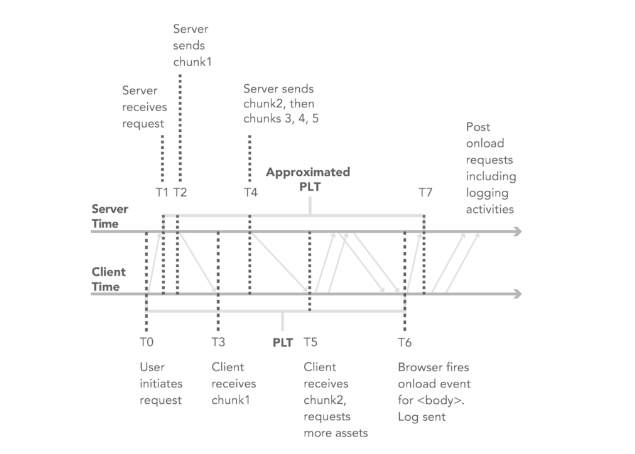

# Simple Sequential A/B Testing

-  The **significance level** determines the probability that we wrongly conclude that there is a real effect in our experiment. So if we set our significance level on say 5%, the likelihood that we falsely infer that our new design, campaign or feature has a real effect is not bigger than 5%.
- A test’s **false positive rate** is based on the assumption that we check the results only once, after obtaining enough samples. The minimum required sample size is calculated so that when we have enough samples, the probability to falsely refute the null hypothesis when looking at the results is the selected level of significance. If instead, we check the results k times while conducting the test, we have k opportunities to make a wrong decision based on the results. **Hence the Type-I-Error rate of our test increases every time we have a look at our results!**
- With peeking, we will end up with nominal p-Values much smaller than the actual ones. Thus we’ll be more likely to refute an actually true hypothesis.

- In sequential AB-tests, the final sample size where the AB-test is stopped is dependent on the data we observe during the test. So if we observe more extreme results at the start, the test can be ended earlier. To achieve this, a pair of statistical borders are drawn, e.g. based on the Type-I-Error rate we would like to obtain in our test. For every new data point we get, the sum of the log-likelihood ratio of our data is then compared to these boundaries

1. Сalculations are made for a **one-sided test** in this calculator. It is called one-sided as it helps to check if the critical area of a distribution is either greater than or less than a certain value, but not both. Let’s analyze an example to see when we need one-sided tests and when two-sided ones.

2. Imagine we believe that our control variation A performs worse than variation B. Therefore, A > B is our null hypothesis (the one we’ll try to reject via A/B testing):
   - If we want to prove that  A≠B, we will have to check the null hypothesis A=B using a two-sided test;
   - If we want to prove that the performance of variation B isn’t worse compared to variation A (A≤B), our null hypothesis will be A>B and we’ll check it with a one-sided test.
3. To reject a certain percentage of observations, we have to define the parameters we need for a sequential A/B test:
  - **Minimum Detectable Effect (MDE)** — a minimum improvement over the baseline conversion that you’re willing to detect in an A/B test. It’s better to opt for Relative MDE as it allows you to skip defining of the Baseline conversion rate. This parameter is critical for your experiment as it favors precision. Let’s say, your MDE is 10% and your A/B test showed the following results:
    - The conversion rate of your control variation A was 50%
    - The conversion rate of your treatment variation B was 55%
    - Such results fail to detect a meaningful difference between variations as with relative MDE=10% the system treats 50% as 45%.
  - **Significance level (α)** — the probability of the null hypothesis being rejected while in reality, the null hypothesis is right. Simply put, this is the chance of false results of our A/B test. Going back to the example above, this parameter defines the percentage of time when the test proves that A≤B while in reality A>B. 5% is the optimal significance level for A/B testing.
  - **Statistical power (100%—β)** — the probability of the null hypothesis being rejected while in reality the null hypothesis is indeed wrong and our initial presumption was correct. 80% is the optimal power for A/B testing. 

4. **Now let’s examine each step of the sequential A/B testing procedure:**
- Start your experiment with choosing sample size, let’s call it N;
- Randomly assign variations under test to the treatment and control, with 50% probability each.
- Track the number of incoming successes for both variations. Let’s refer to the conversion rate of treatment variation as T, and CR of control as C.
- It’s necessary to finish the test when T−C reaches √2N and declare the treatment variation to be the winner of your A/B test.
- It’s necessary to finish the test when T+C reaches N. In such case, declare that the experiment had no winner.

5. **The two-sided test is essentially the same, but with an alternate ending:**
If T−C
 reaches 2.25N−−√
, stop the test. Declare the treatment to be the winner.

If C−T
 reaches 2.25N−−√
, stop the test. Declare the control to be the winner.

If T+C
 reaches N
, stop the test. Declare no winner.

# Comparing Classic and Sequential A/B Tests 

Imagine that your baseline conversion is 2%. Let’s calculate the sample size for a classic A/B test based on this parameter:
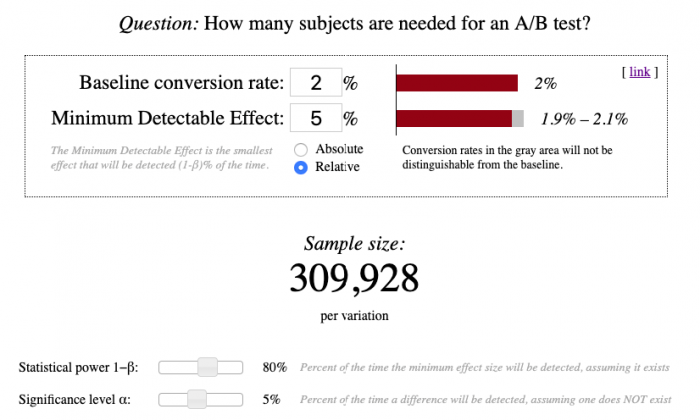

1. We launch our experiment and wait for each variation to have at least 309,928 visitors. Only then we can get down to analyzing the results.
2. Assume that each variation had 310,000 sessions after 7 days of our A/B test:
  - Control variation A got 6,200 conversions;
  - Treatment variation B got 6,420 conversions.
  - The calculations show that variation B won and the test can be finished.
  - The total number of conversions was 12,620 (6,200 + 6,420) and the difference between variations was 220 conversions. 
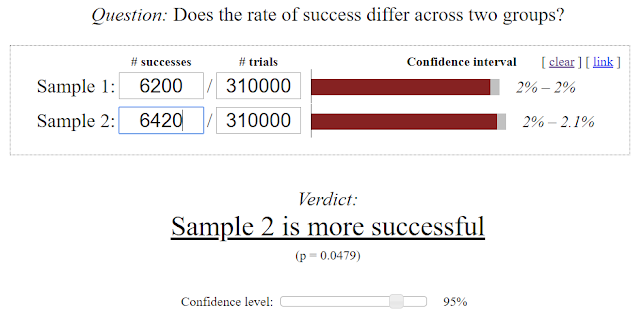
  - Considering that for a successful experiment the chance of mistake (p-value — the worst-case probability when the null hypothesis is true) shouldn’t exceed 5%, the 218 conversions difference was enough for statistical significance of our A/B test. 

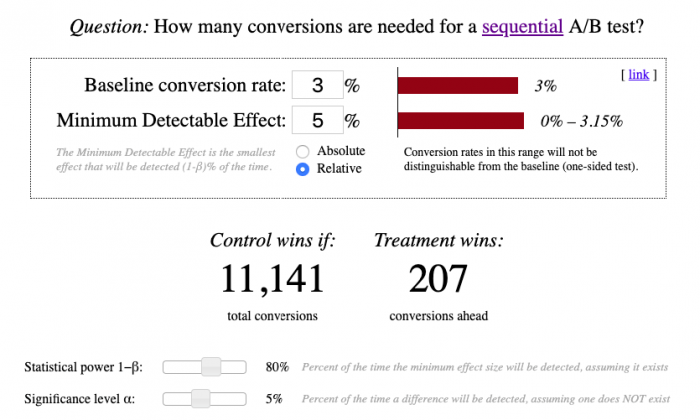

1. Assume that after 5 days of this test we got the following results:
   - Control variation A got 5,460 conversions;
   - Treatment variation B got 5,681 conversions.
   - The sum of conversions is 11,141 (5,460 + 5,681) and the difference between variations performance exceeds 207. Thus, the test can be finished.
   - If we compare these two experiments we’ll notice that sequential A/B testing helped to reduce the number of required conversions from 12,620 to 11,141 (12%) and take minimal required conversion difference from 218 to 207.
2. Furthermore, the calculations by Evan Miller demonstrate that:
   - The less is MDE, the more traffic is saved in case of sequential sampling. It’s possible to save 40% or even more at times;
   - There are cases when sequential sampling requires more conversions than classic A/B testing;
3. To ensure that sequential sampling method suits you, do the following calculations:
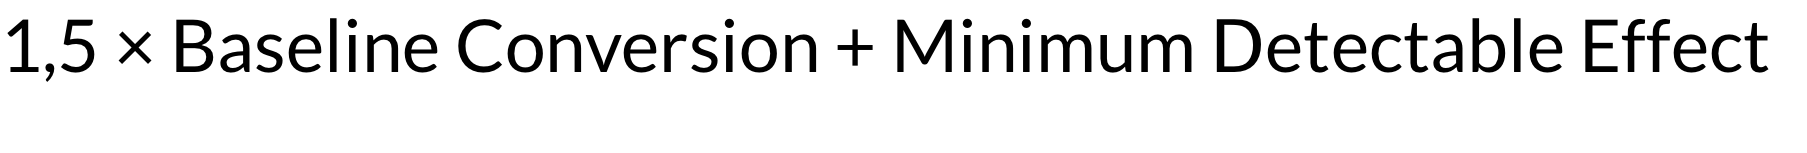
   - If the result exceeds 36%, classic approach to A/B testing will help to finish your experiment earlier.
   - If the result is less than 36%, it makes sense to opt for sequential A/B testing as it will help you get trustworthy results faster using less traffic.